상위 강의 자막 & 하위 강의 자막

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hslio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hslio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hslio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


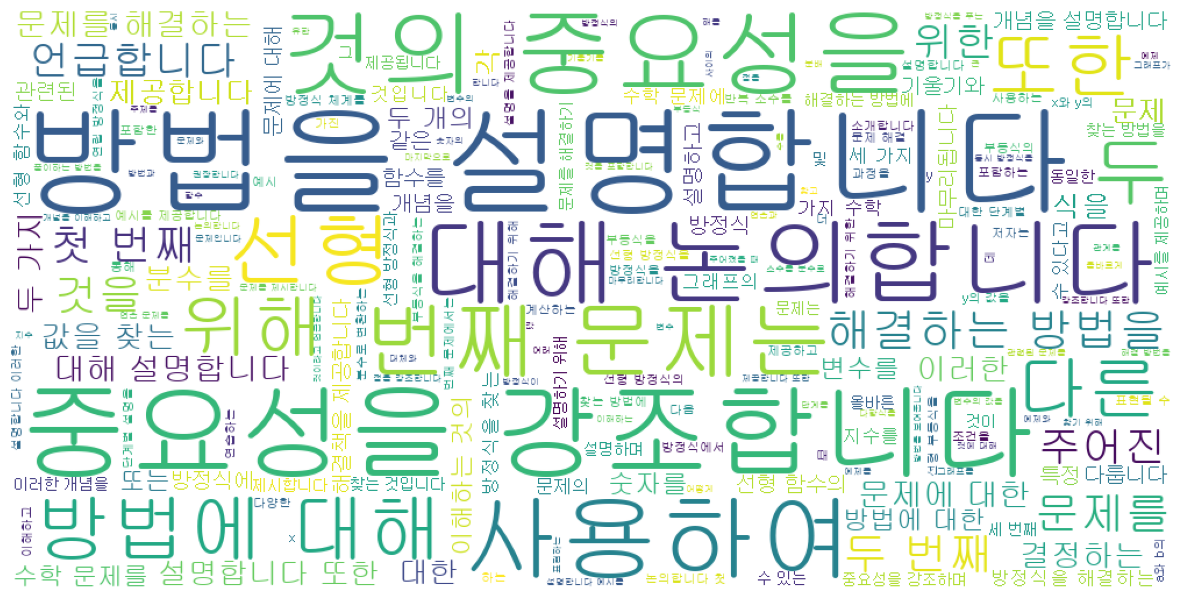

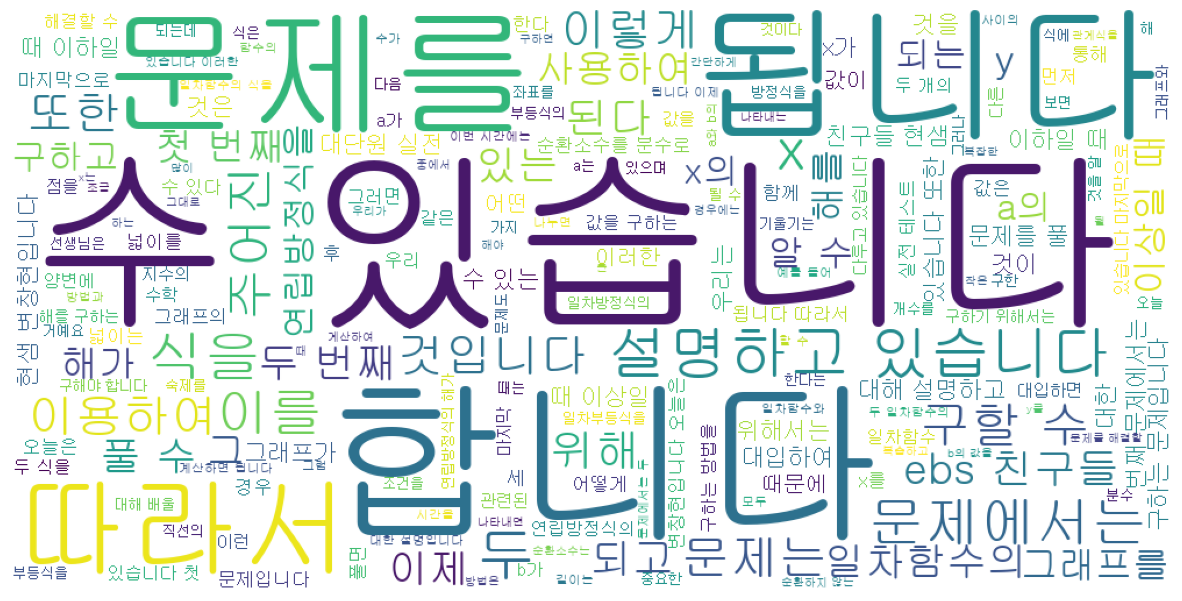

Positive sentences: 0
Negative sentences: 0
Neutral sentences: 866
['안녕하세요, EBS 친구들!', '선생님은 뉴런 발전 수업 함께할 변창현, 현샘입니다.', '우리 발전 수업은 선생님이 핵심 개념을 전수하고, 서술형 문제를 집중적으로 다룰 예정입니다.', '오늘은 유리수와 소수, 순환소수에 대해 배울 것이며, 순환마디를 이용한 표현도 알려줄 것입니다.', '이해하기 쉽게 예제 문제도 함께 풀어볼 예정입니다.이 텍스트는 순환소수와 유한소수에 대해 설명하고 있습니다.', '순환소수와 유한소수를 소수로 표현하는 방법과 그 의미에 대해 설명하고 있으며, 유한소수가 되기 위한 조건과 그 의미를 이해하는 것이 중요하다고 강조하고 있습니다.이 텍스트는 수학 문제를 풀 때 주의해야 할 사항에 대해 설명하고 있습니다.', '서술형 문제를 풀 때는 수식을 많이 사용해야 하며, 새로 배운 내용을 포함시켜야 합니다.', '순환소수를 나타낼 때는 나누기 과정을 쓰고 지워도 되는지 여쭤봐야 합니다.', '분수를 소수로 나타낼 때 순환마디의 개수를 구하고, 특정 자리의 숫자를 구하는 문제를 풀 때는 순환마디의 길이를 이용하여 계산할 수 있습니다.100번째 자리 수는 5입니다.', '이 문제는 서술형 답안지에 문학작품을 만들지 말고 간단하게 쓰라는 것입니다.', '다음 문제는 중서대 Level 3이고, 분수 160분12를 (10의 a제곱)분의 b로 나타낼 때, 가장 작은 자연수 a와 b의 값을 구해야 합니다.', '이 문제를 풀 때는 분수를 약분해야 합니다.위의 텍스트는 순환소수에 대한 설명입니다.', '순환소수는 무한소수 중에서도 소수점 아래의 어떤 자리에서부터 일정한 숫자의 배열이 반복되는 소수입니다.', '이번 수업에서는 순환소수에 대해 배웠으며, 순환소수를 이용한 문제를 풀어보았습니다.', '수업이 끝나면 숙제를 하나 낼 예정이며, 문제를 푼 후 질문과 답변을 게시판에 남기면 선생님이 친절하게 답변해줄 것입니다.', '수업이

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.util import ngrams
import spacy
import nltk
nltk.download('vader_lexicon')
from plotly.subplots import make_subplots


with open('./Lecture_Text/summarize/손석민/중학뉴런수학2학년(상)_손석민_GPT_ALL_KOR_41672.txt', 'r', encoding='utf-8') as file:
    lecture_top = file.read()
with open('./Lecture_Text/summarize/변창현/중학뉴런수학2학년(상)_변창현_GPT_ALL_62031.txt', 'r', encoding='utf-8') as file:
    lecture_bottom = file.read()


#################################
# Preprocess the lecture_top data
#################################
nltk.download('punkt')
nltk.download('stopwords')
stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에',
              '와','한','하다', '.', ',', '(', ')', '!', '?', '-', '‘', '’', '“', '”', '…', '텍스트는',
              '그리고', '그래서']
word_tokens_lecture = word_tokenize(lecture_top.lower())
filtered_text_lecture_list = [word for word in word_tokens_lecture if word.isalpha() and word not in stop_words]
filtered_text_lecture_string = ' '.join(filtered_text_lecture_list)
# Preprocess the lecture_bottom data
word_tokens_lecture_bottom = word_tokenize(lecture_bottom.lower())
filtered_text_lecture_bottom_list = [word for word in word_tokens_lecture_bottom if word.isalpha() and word not in stop_words]
filtered_text_lecture_bottom_string = ' '.join(filtered_text_lecture_bottom_list)


############################
###### Word Frequency ######
############################
# Word Frequency for lecture_top
word_freq_lecture = Counter(filtered_text_lecture_list)
df_lecture_top = pd.DataFrame.from_dict(word_freq_lecture, orient='index').reset_index()
df_lecture_top = df_lecture_top.rename(columns={'index':'word', 0:'count'})
df_lecture_top = df_lecture_top.sort_values(by='count', ascending=False).head(10)
# Word Frequency for lecture_bottom
word_freq_lecture_bottom = Counter(filtered_text_lecture_bottom_list)
df_lecture_bottom = pd.DataFrame.from_dict(word_freq_lecture_bottom, orient='index').reset_index()
df_lecture_bottom = df_lecture_bottom.rename(columns={'index':'word', 0:'count'})
df_lecture_bottom = df_lecture_bottom.sort_values(by='count', ascending=False).head(10)
# Add lecture_bottom data to the word frequency graph
fig = go.Figure()
fig.add_trace(go.Bar(x=df_lecture_top['word'], y=df_lecture_top['count'], name='Top Rank Lecture'))
fig.add_trace(go.Bar(x=df_lecture_bottom['word'], y=df_lecture_bottom['count'], name='Bottom Rank Lecture'))
fig.update_layout(barmode='group', title_text="Top 10 Word Frequency Comparison")
fig.show()


########################
###### Word Cloud ######
########################
# Pillow==9.5.0
# Word Cloud for lecture_top
wordcloud = WordCloud(width = 1000, height = 500, 
                      background_color="white", 
                      font_path='C:\\Windows\\Fonts\\NGULIM.TTF'
                      ).generate(filtered_text_lecture_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Word Cloud for lecture_bottom
wordcloud = WordCloud(width = 1000, height = 500,
                      background_color="white", 
                      font_path='C:\\Windows\\Fonts\\NGULIM.TTF'
                      ).generate(filtered_text_lecture_bottom_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


################################
###### Sentiment Analysis ######
################################
sia = SentimentIntensityAnalyzer()
# Split the text into sentences
sentences_top = nltk.sent_tokenize(lecture_top)
# Initialize counters for each sentiment
positive = 0
negative = 0
neutral = 0
# Perform sentiment analysis on each sentence and count the number of each sentiment
for sentence in sentences_top:
    sentiment = sia.polarity_scores(sentence)
    if sentiment['compound'] > 0.05:
        positive += 1
    elif sentiment['compound'] < -0.05:
        negative += 1
    else:
        neutral += 1
# Print the number of each sentiment
print(f"Positive sentences: {positive}")
print(f"Negative sentences: {negative}")
print(f"Neutral sentences: {neutral}")
# Create a DataFrame for plotting
df_lecture_top_sent = pd.DataFrame({'sentiment': ['positive', 'negative', 'neutral'], 'count': [positive, negative, neutral]})
# Sentiment Analysis for lecture_bottom
sentences_bottom = nltk.sent_tokenize(lecture_bottom)
print(sentences_bottom)
positive_bottom = 0
negative_bottom = 0
neutral_bottom = 0
for sentence in sentences_bottom:
    sentiment = sia.polarity_scores(sentence)
    if sentiment['compound'] > 0.05:
        positive_bottom += 1
    elif sentiment['compound'] < -0.05:
        negative_bottom += 1
    else:
        neutral_bottom += 1
df_lecture_bottom_sent = pd.DataFrame({'sentiment': ['positive', 'negative', 'neutral'], 'count': [positive_bottom, negative_bottom, neutral_bottom]})
# Add lecture_bottom data to the sentiment analysis graph
fig = go.Figure()
fig.add_trace(go.Bar(x=df_lecture_top_sent['sentiment'], y=df_lecture_top_sent['count'], name='Top Rank Lecture',
                     text=df_lecture_top_sent['count'],
                     textposition='auto'))
fig.add_trace(go.Bar(x=df_lecture_bottom_sent['sentiment'], y=df_lecture_bottom_sent['count'], name='Bottom Rank Lecture',
                     text=df_lecture_bottom_sent['count'],
                     textposition='auto'))
fig.update_layout(barmode='group', title_text="Sentimental Analysis")
# Plotting sentiment analysis with Plotly
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.show()


#####################
###### N-grams ######
#####################
bigrams = list(ngrams(filtered_text_lecture_list, 5))
bigram_freq = Counter(bigrams)
df_bigrams_top = pd.DataFrame.from_dict(bigram_freq, orient='index').reset_index()
df_bigrams_top = df_bigrams_top.rename(columns={'index':'bigram', 0:'count'})
# Sort by count and select top 20
df_bigrams_top = df_bigrams_top.sort_values(by='count', ascending=False)
# Plotting bigram frequency with Plotly
# N-grams for lecture_bottom
bigrams_bottom = list(ngrams(filtered_text_lecture_bottom_list, 5))
bigram_freq_bottom = Counter(bigrams_bottom)
df_bigrams_bottom = pd.DataFrame.from_dict(bigram_freq_bottom, orient='index').reset_index()
df_bigrams_bottom = df_bigrams_bottom.rename(columns={'index':'bigram', 0:'count'})
df_bigrams_bottom = df_bigrams_bottom.sort_values(by='count', ascending=False)
# Add lecture_bottom data to the bigram frequency graph
fig = go.Figure()
fig.add_trace(go.Bar(x=df_bigrams_top['bigram'], y=df_bigrams_top['count'], name='Top Rank Lecture'))
fig.add_trace(go.Bar(x=df_bigrams_bottom['bigram'], y=df_bigrams_bottom['count'], name='Bottom Rank Lecture'))
fig.update_layout(barmode='group', title_text="Bigram Frequency")
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.show()


################################
# Named Entity Recognition (NER)
################################
nlp = spacy.load('ko_core_news_sm')
doc_top = nlp(filtered_text_lecture_string)
ner = [(X.text, X.label_) for X in doc_top.ents]
# Convert to DataFrame
df_ner_top = pd.DataFrame(ner, columns=['entity', 'label'])
# Count the frequency of each entity
df_ner_top['count'] = df_ner_top.groupby('entity')['entity'].transform('count')
# Sort by count and select top 20
df_ner_top = df_ner_top.sort_values(by='count', ascending=False).drop_duplicates().head(5)

doc_bottom = nlp(filtered_text_lecture_bottom_string)
ner_bottom = [(X.text, X.label_) for X in doc_bottom.ents]
df_ner_bottom = pd.DataFrame(ner_bottom, columns=['entity', 'label'])
df_ner_bottom['count'] = df_ner_bottom.groupby('entity')['entity'].transform('count')
df_ner_bottom = df_ner_bottom.sort_values(by='count', ascending=False).drop_duplicates().head(5)
# Plotting NER with Plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_ner_top['entity'], y=df_ner_top['count'], name='Top Rank Lecture'))
fig.add_trace(go.Bar(x=df_ner_bottom['entity'], y=df_ner_bottom['count'], name='Bottom Rank Lecture'))
fig.update_layout(barmode='group', title_text="Top 5 Named Entity Recognition")
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.show()


############################################
####### Part of Speech (POS) Tagging #######
############################################
pos_tags = nltk.pos_tag(filtered_text_lecture_list)
df_tag_top = pd.DataFrame(pos_tags, columns=['word', 'POS'])
# Create a mapping dictionary
pos_mapping = {'NNP': 'Proper Noun,<br>Singular', 
               'NN': 'Noun,<br>Singular or Mass', 
               'VB': 'Verb,<br>Base Form', 
               'VBZ': 'Verb,<br>3rd person<br>Singular Present', 
               'JJ': 'Adjective', 
               'DT': 'Determiner', 
               'IN': 'Preposition'} 
color_mapping = {'Proper Noun,<br>Singular': 'blue'}
# lecture_top
df_tag_top['POS'] = df_tag_top['POS'].replace(pos_mapping)
df_tag_top['count'] = df_tag_top.groupby('POS')['POS'].transform('count') # Count the frequency of each POS
df_tag_top = df_tag_top.sort_values(by='count', ascending=False).drop_duplicates() # Sort by count
# Split the data into two based on the count
df_tag_top1 = df_tag_top[df_tag_top['count'] > 1000]  # Adjust this value based on your data
df_tag_top2 = df_tag_top[df_tag_top['count'] <= 1000]  # Adjust this value based on your data
# lecture_bottom
pos_tags_bottom = nltk.pos_tag(filtered_text_lecture_bottom_list)
df_tag_bottom = pd.DataFrame(pos_tags_bottom, columns=['word', 'POS'])
df_tag_bottom['POS'] = df_tag_bottom['POS'].replace(pos_mapping)
df_tag_bottom['count'] = df_tag_bottom.groupby('POS')['POS'].transform('count')
df_tag_bottom = df_tag_bottom.sort_values(by='count', ascending=False).drop_duplicates()
df_tag_bottom1 = df_tag_bottom[df_tag_bottom['count'] > 1000]
df_tag_bottom2 = df_tag_bottom[df_tag_bottom['count'] <= 1000]

# Group by 'POS' and calculate the mean of 'count'
df_tag_top1_grouped = df_tag_top1.groupby('POS', as_index=False)['count'].mean()
df_tag_top2_grouped = df_tag_top2.groupby('POS', as_index=False)['count'].mean()
df_tag_top2_grouped = df_tag_top2_grouped.sort_values('count', ascending=False)
df_tag_bottom1_grouped = df_tag_bottom1.groupby('POS', as_index=False)['count'].mean()
df_tag_bottom2_grouped = df_tag_bottom2.groupby('POS', as_index=False)['count'].mean()
df_tag_bottom2_grouped = df_tag_bottom2_grouped.sort_values('count', ascending=False)
df_tag_bottom2_grouped = df_tag_bottom2_grouped.head(5)

# Create subplot with two y-axes
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(x=df_tag_top1_grouped['POS'], y=df_tag_top1_grouped['count'], text=df_tag_top1_grouped['count'], 
                     textposition='auto', marker_line_width=0), row=1, col=1) 
fig.add_trace(go.Bar(x=df_tag_top2_grouped['POS'], y=df_tag_top2_grouped['count'], text=df_tag_top2_grouped['count'], 
                     textposition='auto', marker_line_width=0), row=2, col=1)
fig.update_layout(height=600, width=800, title_text="Top Rank Part of Speech Tagging")
fig.update_layout(showlegend=False)
fig.show()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(x=df_tag_bottom1_grouped['POS'], y=df_tag_bottom1_grouped['count'], text=df_tag_bottom1_grouped['count'], 
                     textposition='auto', marker_line_width=0), row=1, col=1)
fig.add_trace(go.Bar(x=df_tag_bottom2_grouped['POS'], y=df_tag_bottom2_grouped['count'], text=df_tag_bottom2_grouped['count'], 
                     textposition='auto', marker_line_width=0), row=2, col=1)
fig.update_layout(height=600, width=800, title_text="Bottom Rank Part of Speech Tagging")
fig.update_layout(showlegend=False)
fig.show()